## Parte 2 - Laboratorio 3 - Modelación y Simulación

Stefano Aragoni, Carol Arévalo, Luis Santos, Diego Perdomo

------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom, gamma, poisson
from scipy.stats import norm, expon
from scipy.stats import kstest

-------
## Tasks 1

Considere un experimento en el cual se cuentan cuántos carros pasan por una calle determinada dentro de un
rango de tiempo dado. Sabemos que el tiempo de espera para el n-ésimo evento puede ser modelando a través de
una variable gamma. Considere el caso en el que usted está esperando que pase el 3er carro en la calle dada.

1. Para diferentes lambdas en [2, 1, 0.5], grafique las distribuciones gamma para cada uno de los casos.

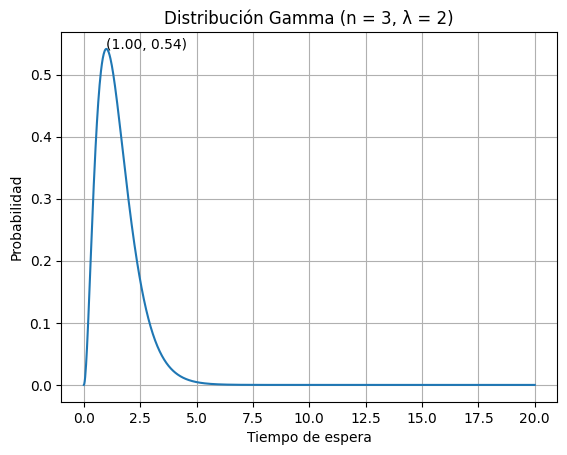

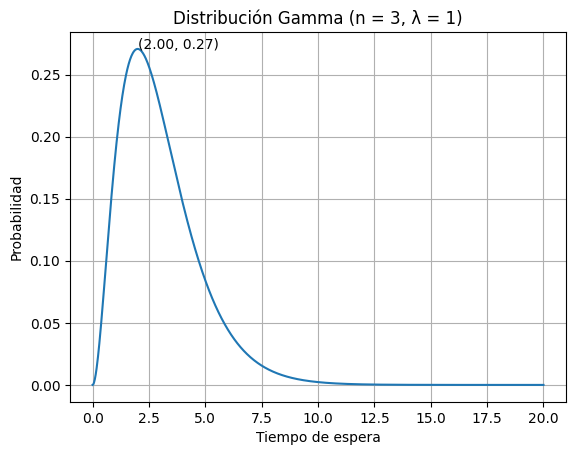

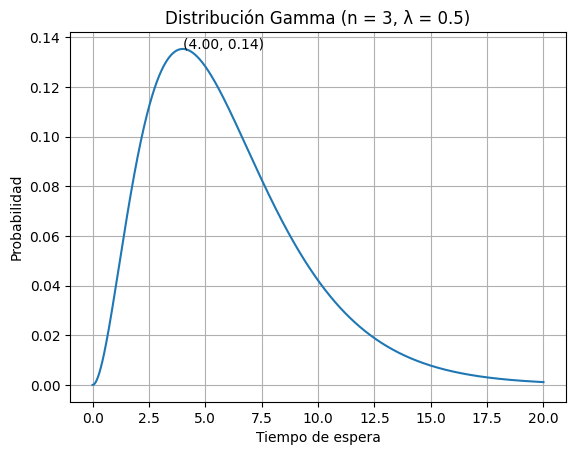

In [11]:
lambdas = [2, 1, 0.5]

for lambd in lambdas:
    x = np.linspace(0, 20, 1000)                        # Rango de valores de x
    y = gamma.pdf(x, 3, scale=1/lambd)                  # n = 3, scale = 1/λ

    plt.plot(x, y, label=f"λ = {lambd}")
    plt.xlabel('Tiempo de espera')
    plt.ylabel('Probabilidad')
    plt.title(f'Distribución Gamma (n = 3, λ = {lambd})')
    plt.grid(True)

    ymax = y.max()
    xpos = y.argmax()
    xmax = x[xpos]
    plt.annotate(f"({xmax:.2f}, {ymax:.2f})", xy=(xmax, ymax), xytext=(xmax, ymax))

    plt.show()

2. ¿Qué conclusiones puede obtener de las gráficas obtenidas en términos de los tiempos de espera y el
número de ocurrencias del evento? ¿Qué relación existe entre el tiempo de espera y el número de
ocurrencias de un evento?